# Project 4 Clustering and Topic Modeling Yelp Reviews of Restaurants in IL
# Data Cleaning
## Katie Fan

In [ ]:
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Data is downloaded from https://www.yelp.com/dataset/challenge
# import data into MongoDB
# terminal code
# mongoimport --db yelp --collection reviews --file /Users/katiefan/Downloads/yelp_dataset/review.json
# mongoimport --db yelp --collection business --file /Users/katiefan/Downloads/yelp_dataset/business.json

In [2]:
# create a client that uses the default port on localhost
client = MongoClient()

In [3]:
db = client.yelp

In [4]:
# list collection names under yelp database
db.list_collection_names()

['business', 'reviews']

In [35]:
# load business data for IL business ids into a data frame
il_business_id = []
il_name = []
il_city = []
il_categories = []
il_review_count = []
il_stars = []
il_is_open = []
for i in db.business.find({'state':'IL'}, {'business_id':1, 'name':1, 'stars':1,
                                          'city':1, 'categories':1, 'review_count':1, 'is_open':1, '_id':0}):
    il_business_id.append(i['business_id'])
    il_name.append(i['name'])
    il_city.append(i['city'])
    il_categories.append(i['categories'])
    il_review_count.append(i['review_count'])
    il_stars.append(i['stars'])
    il_is_open.append(i['is_open'])

il_dict = {'business_id':il_business_id, 'name':il_name, 'city':il_city, 'categories':il_categories, 
           'review_count':il_review_count, 'stars':il_stars, 'is_open':il_is_open}
business_il_df = pd.DataFrame(data=il_dict, columns=['business_id', 'name', 'city', 'stars', 'review_count', 'categories', 'is_open'])
print(business_il_df.shape)
business_il_df.head()

(1932, 7)


,business_id,name,city,stars,review_count,categories,is_open
0,tsXCDIijxbgsh980VgRc9g,Federal Companies,Champaign,3.0,11,"Movers, Local Services, Self Storage, Home Ser...",1
1,fsklFcY47qJIr0mjgobuUg,Ford City,Champaign,2.5,3,"Car Dealers, Auto Repair, Auto Parts & Supplie...",0
2,mofOjB6flg-eAWOFbOkHfQ,ChinaTown Buffet,Champaign,2.5,72,"Sushi Bars, Buffets, Restaurants, Chinese",1
3,P4HqDYI1icascvcwca7iLg,Macy's,Champaign,2.5,12,"Men's Clothing, Shopping, Department Stores, F...",1
4,eezVjNlzIZrXs9GM5O8b2w,Vape Vault,Champaign,4.0,5,"Shopping, Vape Shops",1


In [88]:
# create a list of business ids in IL
id_list = business_il_df.business_id.tolist()

In [52]:
# load all reviews of IL businesses ids into a dataframe
reviews_il = list(db.reviews.find({'business_id': {'$in': id_list }}, {'business_id': 1, 'text': 1, 'stars': 1}))
reviews_il_df = pd.DataFrame(reviews_il)
reviews_il_df.head()

,_id,business_id,stars,text
0,5cdc66e40028847c6f0e74c6,E9HN0nA8eRsIBZYkL0H3xA,4.0,I got stuck in Myrtle Beach last week and stay...
1,5cdc66e40028847c6f0e7511,LW21U6m6axC2lCLYc0fFSA,4.0,Their red velvet cupcakes are AMAZING! Their b...
2,5cdc66e40028847c6f0e756b,w2xwgqHM7dJlHfyu4ouhBg,5.0,Azzip Pizza is literally SO good. I have been ...
3,5cdc66e40028847c6f0e75f3,E4t43bnsfeOY2bv_8IPmSw,4.0,Great-tasting deep dish pizzas. They make a m...
4,5cdc66e40028847c6f0e76d0,i9M6oO2LMUrrEytHnHjyLA,4.0,I will say that the unsalted edemame was not e...


In [53]:
# get shape of dataset reviews_il_df
reviews_il_df.shape

(42371, 4)

In [54]:
# merge reviews_il_df with business_il_df 
df_il = reviews_il_df.merge(business_il_df, how='inner', on='business_id')
df_il.shape

(42371, 10)

In [55]:
df_il.head()

,_id,business_id,stars_x,text,name,city,stars_y,review_count,categories,is_open
0,5cdc66e40028847c6f0e74c6,E9HN0nA8eRsIBZYkL0H3xA,4.0,I got stuck in Myrtle Beach last week and stay...,Courtyard by Marriott Champaign,Champaign,3.0,21,"Hotels & Travel, Event Planning & Services, Ho...",1
1,5cdc66e50028847c6f0f04a9,E9HN0nA8eRsIBZYkL0H3xA,1.0,"Unfortunately, I have to agree with the other ...",Courtyard by Marriott Champaign,Champaign,3.0,21,"Hotels & Travel, Event Planning & Services, Ho...",1
2,5cdc66e50028847c6f0f6d2e,E9HN0nA8eRsIBZYkL0H3xA,5.0,Can't go wrong with 24 hour Starbuck's service...,Courtyard by Marriott Champaign,Champaign,3.0,21,"Hotels & Travel, Event Planning & Services, Ho...",1
3,5cdc66e60028847c6f0fc2a1,E9HN0nA8eRsIBZYkL0H3xA,2.0,I expected much more than what I received here...,Courtyard by Marriott Champaign,Champaign,3.0,21,"Hotels & Travel, Event Planning & Services, Ho...",1
4,5cdc66e70028847c6f107573,E9HN0nA8eRsIBZYkL0H3xA,3.0,This Courtyard is pretty on par with the other...,Courtyard by Marriott Champaign,Champaign,3.0,21,"Hotels & Travel, Event Planning & Services, Ho...",1


In [56]:
# define the analysis to restaurants only
df_il = df_il[df_il['categories'].notnull()]
df = df_il[df_il['categories'].str.contains('Restaurants| Food | Bars')]
df.shape

(29354, 10)

In [57]:
# analysis focuses on open restaurants only
df = df[df_rest.is_open == 1]
df.shape

(24150, 10)

In [79]:
# analysis focuses on restaurants having more than 20 reviews
df = df[df.review_count>20]

In [80]:
# create a column 'review_length'
df['review_length'] = df['text'].apply(len)

In [81]:
# check for missing values
df.isnull().sum()

_id              0
business_id      0
stars_x          0
text             0
name             0
city             0
stars_y          0
review_count     0
categories       0
is_open          0
review_length    0
dtype: int64

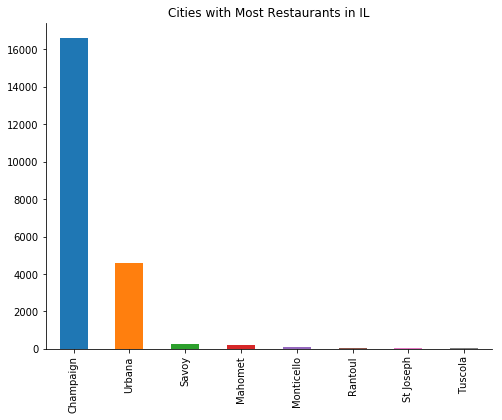

In [82]:
# plot of cities with most restaurants in IL
plt.figure(figsize=(8,6))
df.city.value_counts().plot(kind='bar', title='Cities with Most Restaurants in IL')
sns.despine()
plt.savefig('prj4_city.png', dpi=200);

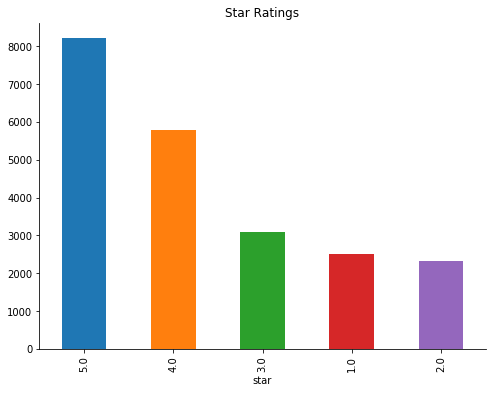

In [83]:
# plot of star ratings
plt.figure(figsize=(8,6))
df.stars_x.value_counts().plot(kind='bar', title='Star Ratings')
plt.xlabel('star')
sns.despine()
plt.savefig('prj4_stars.png', dpi=200);

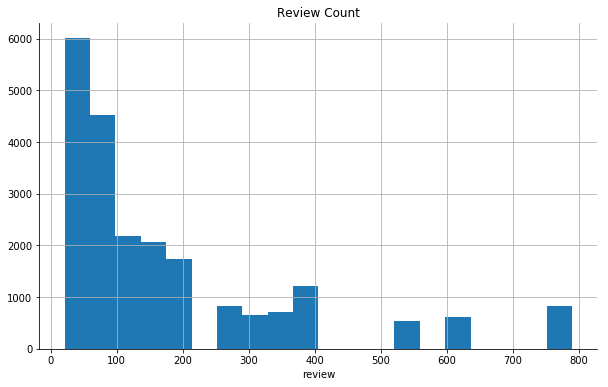

In [84]:
# histgram of review_count
plt.figure(figsize=(10,6))
df.review_count.hist(bins=20)
plt.title('Review Count')
plt.xlabel('review')
sns.despine();

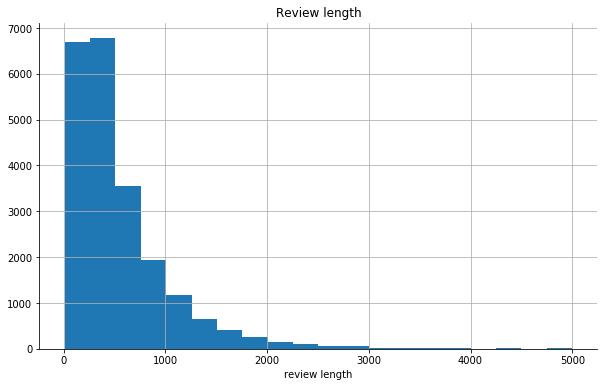

In [85]:
# histgram of review_length
plt.figure(figsize=(10,6))
df.review_length.hist(bins=20)
plt.title('Review length')
plt.xlabel('review length')
sns.despine();

In [86]:
# pickle the dataset
df.to_pickle('/Users/katiefan/Documents/projects/project-4/prj4-df-clean')